#Project Title: MNIST Digit Classification- A Comprehensive Evaluation of ML & DL Models

**This notebook builds, trains, and evaluates five different models on the MNIST dataset, visualizing performance through learning curves, confusion matrices, and a final accuracy comparison.**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
from sklearn.metrics import*

#Load data

In [37]:
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)
print("Example label:", y_train[0])


Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Example label: 5


In [3]:
y_train.shape

(60000,)

In [4]:
y_test.shape

(10000,)

In [5]:
y_train[5]

np.uint8(2)

In [39]:
print(len(x_train))
print(len(x_test))

60000
10000


#Preprocessing and data preparation steps

In [40]:
# Flatten for classical ML models / convert to 2d
x_train_flat = x_train.reshape(len(x_train), -1)
x_test_flat = x_test.reshape(len(x_test), -1)

# Normalization
x_train_flat = x_train_flat / 255.0
x_test_flat = x_test_flat / 255.0

# For neural networks (MLP & CNN)
x_train_nn = x_train / 255.0
x_test_nn = x_test / 255.0

# CNN requires channel dimension
x_train_cnn = x_train_nn.reshape(-1, 28, 28, 1)
x_test_cnn = x_test_nn.reshape(-1, 28, 28, 1)

print("Data ready!")


Data ready!


#Input data

#MLP accepts (batch, 28, 28)/3d but immediately flattens to (batch, 784) / 2d

#CNN accepts (batch, 28, 28, 1) / 4d

#Classical ML accepts (batch, 784) / 2d

#Model Building and Evaluation

#1.Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(max_iter=500)
log_reg.fit(x_train_flat, y_train)

y_pred = log_reg.predict(x_test_flat)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))


Logistic Regression Accuracy: 0.9259


 **LR Confusion Matrix**

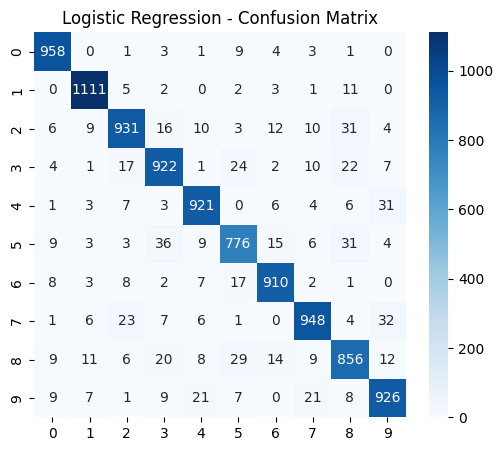

In [18]:
y_pred_lr = log_reg.predict(x_test_flat)
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6,5))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


In [23]:
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_lr

0.9259

**LR Learning Curve**

In [20]:
from sklearn.model_selection import learning_curve

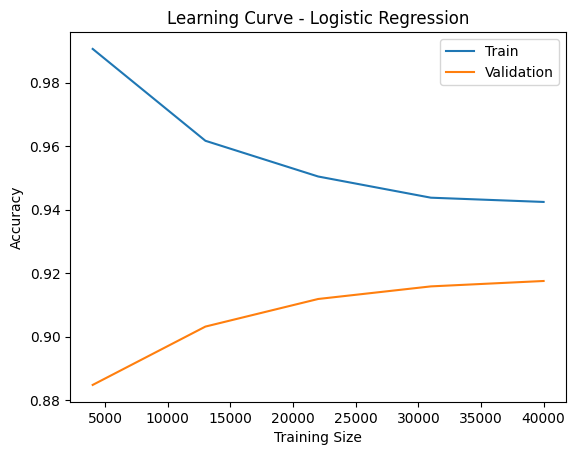

In [21]:
train_sizes, train_scores, test_scores = learning_curve(
    log_reg, x_train_flat, y_train, cv=3, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

plt.plot(train_sizes, train_scores.mean(axis=1), label="Train")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Validation")
plt.title("Learning Curve - Logistic Regression")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


#Inference from above Learning Curve:

#As the training size increases, the training accuracy naturally decreases and then stabilizes because the model can no longer overfit small samples.

#In contrast, the validation/test accuracy increases with more training data and eventually stabilizes, reflecting improved generalization.

#2.Support Vector Machine (SVM)

**SVM is slow on full MNIST. We’ll use 10,000 samples for training.**

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Use subset for speed
x_train_svm = x_train_flat[:10000]
y_train_svm = y_train[:10000]

svm_model = SVC(kernel='rbf')
svm_model.fit(x_train_svm, y_train_svm)

y_pred_svm = svm_model.predict(x_test_flat)
acc_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", acc_svm)


SVM Accuracy: 0.9594


#3.Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train_flat, y_train)

y_pred = rf.predict(x_test_flat)
acc_rf = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", acc_rf)


Random Forest Accuracy: 0.9693


#4.Fully Connected Neural Network (MLP)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

mlp = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

mlp.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

history_mlp = mlp.fit(x_train_nn, y_train, epochs=5, batch_size=32, validation_split=0.1)

mlp.evaluate(x_test_nn, y_test)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8874 - loss: 0.3745 - val_accuracy: 0.9710 - val_loss: 0.0917
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9719 - loss: 0.0913 - val_accuracy: 0.9762 - val_loss: 0.0841
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9829 - loss: 0.0550 - val_accuracy: 0.9755 - val_loss: 0.0958
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9857 - loss: 0.0420 - val_accuracy: 0.9788 - val_loss: 0.0764
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9898 - loss: 0.0312 - val_accuracy: 0.9798 - val_loss: 0.0825
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9746 - loss: 0.0858


[0.0719568133354187, 0.978600025177002]

#5.Convolutional Neural Network (CNN)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

history_cnn = cnn.fit(x_train_cnn, y_train, epochs=5, batch_size=32, validation_split=0.1)

cnn.evaluate(x_test_cnn, y_test)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 55s 32ms/step - accuracy: 0.9031 - loss: 0.3074 - val_accuracy: 0.9893 - val_loss: 0.0413
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 53s 32ms/step - accuracy: 0.9848 - loss: 0.0471 - val_accuracy: 0.9867 - val_loss: 0.0440
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 53s 32ms/step - accuracy: 0.9911 - loss: 0.0277 - val_accuracy: 0.9893 - val_loss: 0.0363
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 57s 34ms/step - accuracy: 0.9936 - loss: 0.0199 - val_accuracy: 0.9913 - val_loss: 0.0362
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 52s 31ms/step - accuracy: 0.9951 - loss: 0.0145 - val_accuracy: 0.9913 - val_loss: 0.0303
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9903 - loss: 0.0314


[0.026179296895861626, 0.9916999936103821]

#A CNN model with convolution layers for feature extraction, pooling layers for downsampling, flattening to convert to 1D, and dense layers for classification.

#Compare Accuracy Scores of all five models

/tmp/ipython-input-3728433082.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="viridis")


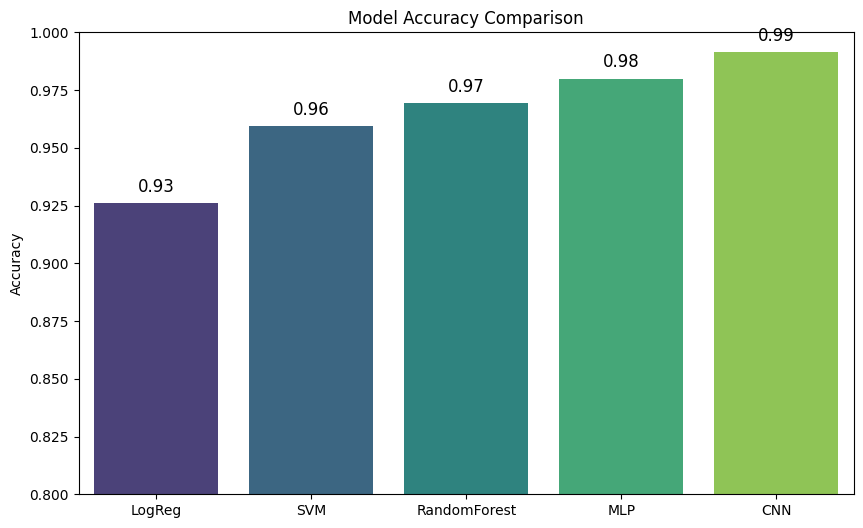

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Collect accuracy values
accuracies = [
    acc_lr,
    acc_svm,
    acc_rf,
    history_mlp.history['val_accuracy'][-1],
    history_cnn.history['val_accuracy'][-1]
]

models = ["LogReg", "SVM", "RandomForest", "MLP", "CNN"]

# Plot comparison
plt.figure(figsize=(10,6))
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)

# Annotate bars with accuracy values
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.005, f"{v:.2f}", ha='center', fontsize=12)

plt.show()


#Summary: This notebook trains and evaluates five models—Logistic Regression, SVM, Random Forest, MLP, and CNN—on the MNIST handwritten digit dataset. It includes learning curves, confusion matrices, and an accuracy comparison to benchmark classical ML against deep learning approaches.